In [1]:
using Distributions
using StatsPlots
default(fmt=:png, size=(400, 250),
    titlefontsize=8, tickfontsize=6, legendfontsize=7, guidefontsize=7)
rd(x) = round(x; digits=3)

rd (generic function with 1 method)

$$
\begin{matrix}
  &       &          & U   & & \\
  &       & \swarrow &     & \searrow & \\
Z & \to X & \to      & \to & \to & Y \\
\end{matrix}
\quad
\begin{cases}
X = bZ + pU + \sigma_1\varepsilon_1 \\
Y = aX + qU + \sigma_2\varepsilon_2 \\
\end{cases}
\quad
\begin{cases}
\text{$\varepsilon_1,\varepsilon_2,Z$ are independent and have mean zero.} \\
E[X^2] = b^2 + p^2 + \sigma_1^2 := 1 \\
\end{cases}
$$

In [2]:
function rand_XYZU(; σ₁, σ₂, a, b, p = √(1-b^2-σ₁^2), q)
    U = randn()
    Z = randn()
    X = b*Z + p*U + σ₁*randn()
    Y = a*X + q*U + σ₂*randn()
    [X, Y, Z, U]
end

function rand_XYZU(n;
        σ₁ = 0.2, σ₂ = 0.2, 
        a = 1.0, b = √((1 - σ₁^2)/2), p = √(1-b^2-σ₁^2), q = 1/p)
    [rand_XYZU(; σ₁, σ₂, a, b, p, q) for _ in 1:n] |> stack
end

rand_XYZU(100) .|> rd

4×100 Matrix{Float64}:
 1.515  -0.944   0.42   -1.002  -0.93   …   0.073  -3.037  0.329   0.073
 3.04   -3.213  -0.599  -0.511  -0.384     -1.316  -8.573  1.069  -0.422
 0.951  -0.329   1.371  -1.076  -1.759      0.538  -0.452  0.197   0.652
 0.98   -1.525  -0.624   0.173   0.308     -0.967  -4.05   0.254  -0.336

In [3]:
function show_XYZU(n = 10^6;
        σ₁ = 0.2, σ₂ = 0.2, 
        a = 1.0, b = √((1 - σ₁^2)/2), p = √(1-b^2-σ₁^2), q = 1/p)
    println("====== model parameters")
    @show rd(σ₁) rd(σ₂) rd(a) rd(b) rd(p) rd(q) n
    println()

    data = rand_XYZU(n; σ₁, σ₂, a, b, p, q)
    X, Y, Z, U = eachrow(data)
    println("====== summary of data")
    @show rd.(mean.((X, Y, Z, U)))
    @show rd.(var.((X, Y, Z, U)))
    @show rd.(std.((X, Y, Z, U)))
    println()

    println("====== resgressions")
    println("=== Y ~ α₁X")
    α = [X;;] \ Y
    @show rd(a + p*q)
    @show rd.(α)
    println("=== Y ∼ β₁Z")
    β = [Z;;] \ Y
    @show rd.(a*b)
    @show rd.(β)
    println("=== X ∼ γ₁Z")
    γ = [Z;;] \ X
    @show rd.(b)
    @show rd.(γ)
    println("=== instrumental variable method")
    @show rd(a)
    @show rd(β[1]/γ[1])
    println()

    println("====== errors of prediction for Y")
    err_α = @. Y - α[1]*X
    err_β = @. Y - β[1]/γ[1]*Z
    @show rd.(mean.((err_α, err_β)))
    @show rd.(var.((err_α, err_β)))
    @show rd.(std.((err_α, err_β)))
    println()

    plot()
    stephist!(err_α; norm=true, label="Y ∼ X", ls=:solid)
    stephist!(err_β; norm=true, label="Y ∼ Z", ls=:dash)
    plot!(xguide="error of prediction for Y")
end

show_XYZU (generic function with 2 methods)

====== model parameters
rd(σ₁) = 0.2
rd(σ₂) = 0.2
rd(a) = 2.0
rd(b) = 0.693
rd(p) = 0.693
rd(q) = 1.443
n = 1000000

====== summary of data
rd.(mean.((X, Y, Z, U))) = (0.0, -0.001, 0.001, -0.001)
rd.(var.((X, Y, Z, U))) = (1.0, 10.12, 1.0, 0.999)
rd.(std.((X, Y, Z, U))) = (1.0, 3.181, 1.0, 1.0)

====== resgressions
=== Y ~ α₁X
rd(a + p * q) = 3.0
rd.(α) = [3.0]
=== Y ∼ β₁Z
rd.(a * b) = 1.386
rd.(β) = [1.387]
=== X ∼ γ₁Z
rd.(b) = 0.693
rd.(γ) = [0.693]
=== instrumental variable method
rd(a) = 2.0
rd(β[1] / γ[1]) = 2.001

====== errors of prediction for Y
rd.(mean.((err_α, err_β))) = (-0.001, -0.002)
rd.(var.((err_α, err_β))) = (1.121, 8.574)
rd.(std.((err_α, err_β))) = (1.059, 2.928)



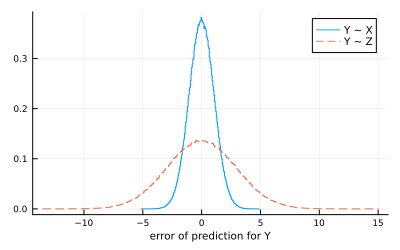

In [4]:
show_XYZU(a=2)

====== model parameters
rd(σ₁) = 0.2
rd(σ₂) = 0.2
rd(a) = 2.0
rd(b) = 0.4
rd(p) = 0.894
rd(q) = 1.118
n = 1000000

====== summary of data
rd.(mean.((X, Y, Z, U))) = (-0.001, -0.003, 0.001, -0.001)
rd.(var.((X, Y, Z, U))) = (1.0, 9.291, 0.999, 1.0)
rd.(std.((X, Y, Z, U))) = (1.0, 3.048, 0.999, 1.0)

====== resgressions
=== Y ~ α₁X
rd(a + p * q) = 3.0
rd.(α) = [3.0]
=== Y ∼ β₁Z
rd.(a * b) = 0.8
rd.(β) = [0.801]
=== X ∼ γ₁Z
rd.(b) = 0.4
rd.(γ) = [0.4]
=== instrumental variable method
rd(a) = 2.0
rd(β[1] / γ[1]) = 2.001

====== errors of prediction for Y
rd.(mean.((err_α, err_β))) = (-0.001, -0.006)
rd.(var.((err_α, err_β))) = (0.29, 10.087)
rd.(std.((err_α, err_β))) = (0.538, 3.176)



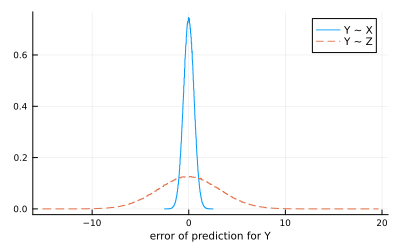

In [5]:
show_XYZU(a=2, b=0.4)

====== model parameters
rd(σ₁) = 0.2
rd(σ₂) = 0.2
rd(a) = 2.0
rd(b) = 0.97
rd(p) = 0.138
rd(q) = 7.236
n = 1000000

====== summary of data
rd.(mean.((X, Y, Z, U))) = (-0.001, -0.001, -0.001, 0.0)
rd.(var.((X, Y, Z, U))) = (0.997, 60.352, 0.997, 1.0)
rd.(std.((X, Y, Z, U))) = (0.999, 7.769, 0.999, 1.0)

====== resgressions
=== Y ~ α₁X
rd(a + p * q) = 3.0
rd.(α) = [2.999]
=== Y ∼ β₁Z
rd.(a * b) = 1.94
rd.(β) = [1.939]
=== X ∼ γ₁Z
rd.(b) = 0.97
rd.(γ) = [0.97]
=== instrumental variable method
rd(a) = 2.0
rd(β[1] / γ[1]) = 1.998

====== errors of prediction for Y
rd.(mean.((err_α, err_β))) = (0.003, 0.002)
rd.(var.((err_α, err_β))) = (51.381, 56.608)
rd.(std.((err_α, err_β))) = (7.168, 7.524)



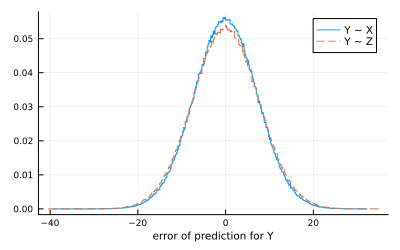

In [6]:
show_XYZU(a=2.0, b=0.97)